In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import lec5_graphs as gfx
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [3]:
df = pd.read_csv('datasets/earnings.csv').drop('Unnamed: 0', axis = 1)
df.head(20)

,earn,height1,height2,sex,race,hisp,ed,yearbn,height,age,age_category,eth,male
0,50000.0,6,2,1,1,2,16,45,74,45,2,3,1
1,60000.0,5,6,2,1,2,16,32,66,58,3,3,0
2,30000.0,5,4,2,1,2,16,61,64,29,1,3,0
3,51000.0,5,3,2,1,2,17,51,63,39,2,3,0
4,9000.0,5,4,2,1,2,15,64,64,26,1,3,0
5,29000.0,5,2,2,1,2,12,41,62,49,2,3,0
6,32000.0,6,1,1,1,2,17,44,73,46,2,3,1
7,2000.0,6,0,1,1,1,15,69,72,21,1,2,1
8,27000.0,6,0,1,1,2,12,64,72,26,1,3,1
9,6530.0,5,10,1,1,2,16,25,70,65,3,3,1


c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


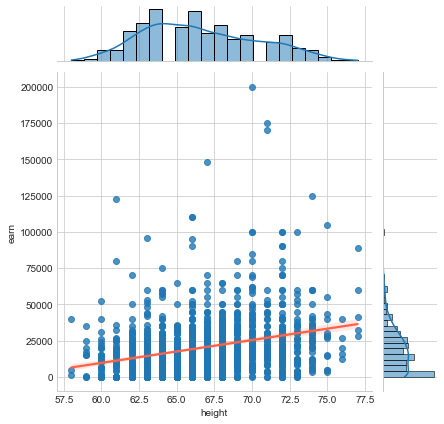

In [4]:
sns.jointplot(df['height'], df['earn'], kind = 'reg', line_kws = {'color':'tomato'})

In [5]:
categorical_columns = ['sex', 'race', 'hisp', 'age_category', 'eth', 'male']

for cat in categorical_columns:
    print('\n', cat)
    print(f'''
    {df[cat].value_counts()}
    {df[cat].value_counts('%')}''')


 sex

    2    856
1    518
Name: sex, dtype: int64
    2    0.622999
1    0.377001
Name: sex, dtype: float64

 race

    1    1216
2     126
3      17
4      10
9       5
Name: race, dtype: int64
    1    0.885007
2    0.091703
3    0.012373
4    0.007278
9    0.003639
Name: race, dtype: float64

 hisp

    2    1294
1      80
Name: hisp, dtype: int64
    2    0.941776
1    0.058224
Name: hisp, dtype: float64

 age_category

    1    564
2    436
3    374
Name: age_category, dtype: int64
    1    0.410480
2    0.317322
3    0.272198
Name: age_category, dtype: float64

 eth

    3    1144
1     126
2      77
4      27
Name: eth, dtype: int64
    3    0.832606
1    0.091703
2    0.056041
4    0.019651
Name: eth, dtype: float64

 male

    0    856
1    518
Name: male, dtype: int64
    0    0.622999
1    0.377001
Name: male, dtype: float64


c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='earn', ylabel='Density'>

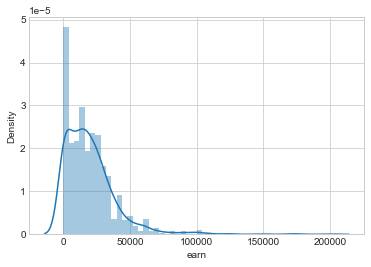

In [6]:
sns.distplot(df['earn'])

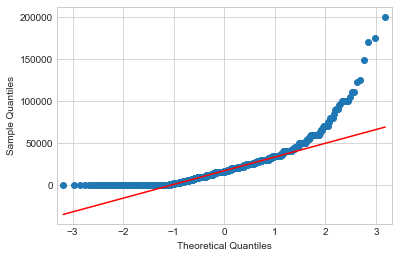

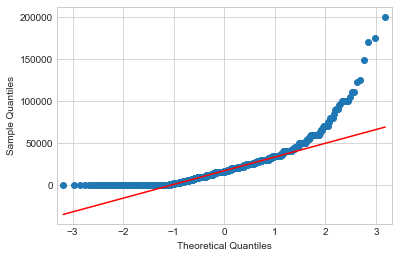

In [7]:
sm.qqplot(df['earn'], line = 'q')

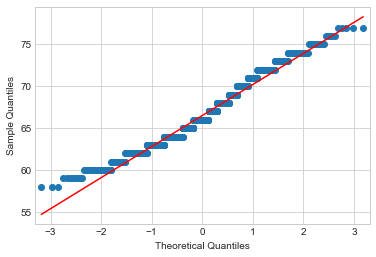

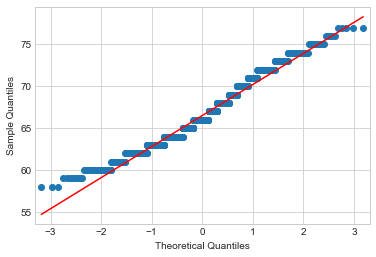

In [8]:
sm.qqplot(df['height'], line = 'q')

c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='height', ylabel='Density'>

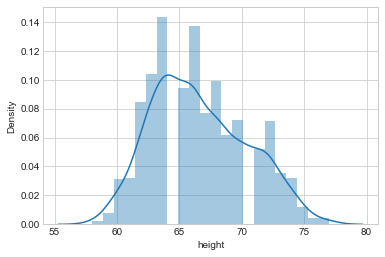

In [9]:
sns.distplot(df['height'])

In [10]:
modelo = smf.ols('earn ~ height', df)

In [11]:
modelo = modelo.fit()

__Hipotesis Nula:__ No existen coeficientes distintos de cero.

$$
H_{o}: \beta_{0} = \beta_{1} = 0
$$

__Hipotesis Alternativa:__ Por lo menos un coeficiente es distinto de cero.

$$
H_{a}: \beta_{0} \neq \beta_{1} \neq 0
$$

In [12]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     138.4
Date:                Thu, 08 Sep 2022   Prob (F-statistic):           1.65e-30
Time:                        12:48:45   Log-Likelihood:                -15475.
No. Observations:                1374   AIC:                         3.095e+04
Df Residuals:                    1372   BIC:                         3.097e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.487e+04   8926.986     -9.507      0.000   -1.02e+05   -6.74e+04
height      1574.4103    133.829     11.764      0.000    1311.879    1836.942
==============================================================================
Omnibus:                      868.584   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13733.247
Skew:                           2.677   Prob(JB):                         0.00
Kurtosis:                      17.533   Cond. No.                     1.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

eval_env: 1


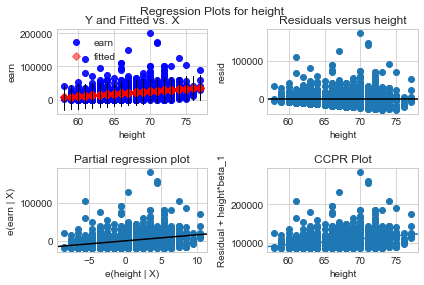

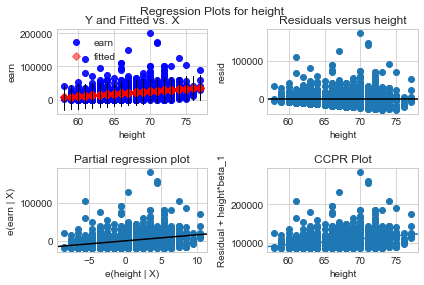

In [13]:
sm.graphics.plot_regress_exog(modelo, 'height')

Si solicitamos un gráfico de cajas entre ambas variables, observamos que el rango del salario para los hombres es mucho mayor que el de las mujeres, y la mediana se sitúa en salarios más altos.

In [14]:
df.loc[df['male'] == 0 ]['earn'].quantile(.75)-df.loc[df['male'] ==
0]['earn'].quantile(.25)

19125.0

<AxesSubplot:xlabel='male', ylabel='earn'>

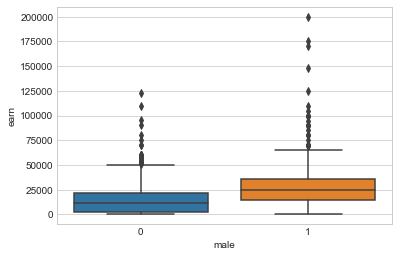

In [15]:
sns.boxplot(x = df['male'], y = df['earn'])

### Sobre las variables binarias
>
>En muchas ocasiones nuestro interés es estimar el efecto de un atributo binario (donde 1 indica la presencia de éste y 0 la ausencia) en nuestra variable objetivo. La convención es siempre como 0 aquella característica más común, dado que podemos capturar el comportamiento más común mediante el intercepto.
>
>Si ejecutamos el modelo con una variable binaria de forma 'earn ~ male', observamos que el sexo del individuo explica en un 12.4% la variabilidad en el salario de la muestra (esto al ver el R-squared reportado). El intercepto sugiere que para las mujeres el salario promedio es de 14,560 dólares, mientras que los hombres presentan una diferencia de 14,380 dólares más en promedio. Ambos coeficientes son significativos al 99%.


In [16]:
model_dummy = smf.ols('earn ~ male', data = df).fit()
model_dummy.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     194.5
Date:                Thu, 08 Sep 2022   Prob (F-statistic):           1.95e-41
Time:                        12:48:46   Log-Likelihood:                -15450.
No. Observations:                1374   AIC:                         3.090e+04
Df Residuals:                    1372   BIC:                         3.092e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.456e+04    632.986     23.004      0.000    1.33e+04    1.58e+04
male        1.438e+04   1030.915     13.946      0.000    1.24e+04    1.64e+04
==============================================================================
Omnibus:                      864.521   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13531.216
Skew:                           2.664   Prob(JB):                         0.00
Kurtosis:                      17.421   Cond. No.                         2.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
earn_fem = 14560
dif_male = 14380

In [18]:
earn_fem + dif_male

28940

c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


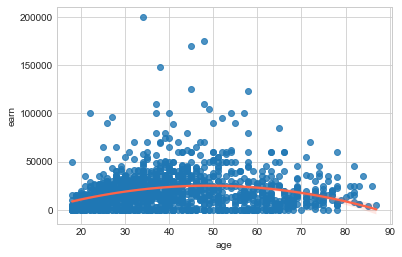

In [19]:
sns.regplot(df['age'], df['earn'], order = 2, line_kws = {'color':'tomato'});


>Se aprecia que la recta indica una parábola negativa: esperamos un peak en el salario percibido cuando los individuos están cerca a los 50 años de edad, declinando después de esa edad.
>
>Ahora generemos el modelo:


In [20]:
# generamos una nueva columna que guarde los resultados de elevar al cuadrado laedad
df['age_sq'] = df['age'] ** 2
# iniciamos el modelo incluyendo ambos términos
model3= smf.ols('earn ~ age + age_sq', data=df).fit()
# pedimos los resultados
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     41.06
Date:                Thu, 08 Sep 2022   Prob (F-statistic):           4.80e-18
Time:                        12:48:47   Log-Likelihood:                -15501.
No. Observations:                1374   AIC:                         3.101e+04
Df Residuals:                    1371   BIC:                         3.102e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.566e+04   3975.144     -3.940      0.000   -2.35e+04   -7863.055
age         1664.1728    184.765      9.007      0.000    1301.719    2026.626
age_sq       -16.9734      1.956     -8.678      0.000     -20.810     -13.137
==============================================================================
Omnibus:                      843.307   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12732.413
Skew:                           2.585   Prob(JB):                         0.00
Kurtosis:                      16.988   Cond. No.                     1.86e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
model_x = smf.ols('earn ~ age + male', df).fit()
model_x.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     105.2
Date:                Thu, 08 Sep 2022   Prob (F-statistic):           3.24e-43
Time:                        12:48:47   Log-Likelihood:                -15443.
No. Observations:                1374   AIC:                         3.089e+04
Df Residuals:                    1371   BIC:                         3.091e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9517.0050   1488.355      6.394      0.000    6597.305    1.24e+04
age          120.0427     32.090      3.741      0.000      57.093     182.993
male        1.465e+04   1028.734     14.244      0.000    1.26e+04    1.67e+04
==============================================================================
Omnibus:                      866.933   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13792.663
Skew:                           2.668   Prob(JB):                         0.00
Kurtosis:                      17.576   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

>El modelo presenta observaciones similares a las del gráfico: mientras que el primer término indica que hay una diferencia de 1.664 dólares entre dos individuos que difieren en 1 año, el segundo término indica una penalización de 16 dólares entre dos individuos que difieren en un año de edad cuando superan la cúspide de ingresos.
>
### Regresión con más de una variable independiente
>
>El modelo de regresión se puede expandir en la cantidad de variables independientes a incluir en la ecuación, dando pie a una regresión lineal múltiple. Agregar variables responde a variados objetivos:
>
>>● Para mejorar nuestra capacidad descriptiva de un modelo y mejorar nuestro entendimiento de las relaciones presentes entre los datos.
>>
>>● Para mejorar nuestra capacidad predictiva en la medida que incluímos más información.
>>
>>● Para considerar de forma explícita problemas causales como las variables intervinientes y controlar por mecanismos alternativas.


In [22]:
model2 = smf.ols('earn ~ ed + male', df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     206.4
Date:                Thu, 08 Sep 2022   Prob (F-statistic):           4.42e-79
Time:                        12:48:47   Log-Likelihood:                -15361.
No. Observations:                1374   AIC:                         3.073e+04
Df Residuals:                    1371   BIC:                         3.074e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.064e+04   2613.174     -7.898      0.000   -2.58e+04   -1.55e+04
ed          2660.1759    192.327     13.832      0.000    2282.889    3037.462
male        1.352e+04    968.064     13.968      0.000    1.16e+04    1.54e+04
==============================================================================
Omnibus:                      829.868   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12917.525
Skew:                           2.515   Prob(JB):                         0.00
Kurtosis:                      17.154   Cond. No.                         76.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# una buena práctica es generar copias de nuestro objeto para evitar modificación.
df_dummy = df.copy()
model_3 = smf.ols('earn ~ ed + male', df_dummy).fit()
# ahora guardemos los valores predichos de nuestro modelo en nuestra base.
df_dummy['yhat'] = model_3.predict()
df_dummy.head()
# output omitido

,earn,height1,height2,sex,race,hisp,ed,yearbn,height,age,age_category,eth,male,age_sq,yhat
0,50000.0,6,2,1,1,2,16,45,74,45,2,3,1,2025,35444.862717
1,60000.0,5,6,2,1,2,16,32,66,58,3,3,0,3364,21923.423771
2,30000.0,5,4,2,1,2,16,61,64,29,1,3,0,841,21923.423771
3,51000.0,5,3,2,1,2,17,51,63,39,2,3,0,1521,24583.599688
4,9000.0,5,4,2,1,2,15,64,64,26,1,3,0,676,19263.247854


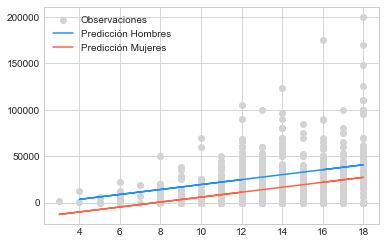

In [24]:

# comencemos por graficar todos los puntos en la relación
plt.scatter(df_dummy['ed'], df_dummy['earn'], color='lightgrey', label = 'Observaciones')
# grafiquemos la proyección para hombres
plt.plot(df_dummy.query('male == 1')['ed'], df_dummy.query('male == 1')['yhat'], color = 'dodgerblue', label = 'Predicción Hombres')
# grafiquemos la proyección para mujeres
plt.plot(df_dummy.query('male == 0')['ed'], df_dummy.query('male == 0')['yhat'], color = 'tomato', label = 'Predicción Mujeres')
plt.legend()

In [25]:
attr_mat = df.drop(['earn'], axis = 1)
X_mat_train = attr_mat[:-30]
X_mat_test = attr_mat[-30:]
y_train = df['earn'][:-30]
y_test = df['earn'][-30:]

In [26]:
X_mat_test.shape

(30, 13)

In [27]:
X_mat_train.shape

(1344, 13)

In [28]:
y_train.shape

(1344,)

In [29]:
y_test.shape

(30,)

In [30]:
modelo_sklearn = LinearRegression().fit(X_mat_train, y_train)

In [31]:
modelo_sklearn.coef_

array([   14.92703623,   132.30589935, -6360.94719277,  -661.37164603,
        1688.11542562,  2428.20840913,  -886.76446618,   311.43033413,
         886.76446618, -3038.69811608,   185.21329516,  6360.94719277,
         -15.73447966])

In [32]:
attr_mat.columns

Index(['height1', 'height2', 'sex', 'race', 'hisp', 'ed', 'yearbn', 'height',
       'age', 'age_category', 'eth', 'male', 'age_sq'],
      dtype='object')

In [33]:
modelo_sklearn.intercept_

13833.688816522365

In [34]:
earn_yhat = modelo_sklearn.predict(X_mat_test)
earn_yhat

array([25598.087715  , 22456.39927869, 25859.43110455,  6927.53079027,
       19541.84095374, 23007.85181165, 15953.0359177 , 20722.82694069,
       30815.51755312, 42107.27749179, 17374.42556013, 27321.46818842,
       16039.6979205 , 42630.94412833, 18053.08347602, 25336.99601278,
       21507.10037955,  6230.39947764, 20825.36789164, -4891.86653372,
       20939.55454344, 31366.3369532 , 41244.16654204, 44883.74058834,
       24000.40337209, 24107.37666572, 18000.07128117, 12600.30094273,
       29170.58626159, 22120.37934468])

In [35]:
mse_modelo = mean_squared_error(y_test, earn_yhat).round(1)
r2_modelo = r2_score(y_test, earn_yhat).round(1)

print(f'''
MSE: {mse_modelo}
R2: {r2_modelo}''')


MSE: 393102326.6
R2: 0.3


In [36]:
columns = df.columns
attr_name, pearson_r, abs_pearson_r = [], [], []

for col in columns:
    if col != 'earn':
        attr_name.append(col)
        pearson_r.append(df[col].corr(df['earn']))
        abs_pearson_r.append(abs(df[col].corr(df['earn'])))

features = pd.DataFrame({'attribute':attr_name, 'corr':pearson_r, 'abs_corr':abs_pearson_r})
features = features.set_index('attribute')
features.sort_values(by = ['abs_corr'], ascending = False)

,corr,abs_corr
attribute,,
sex,-0.352354,0.352354
male,0.352354,0.352354
ed,0.349334,0.349334
height,0.302707,0.302707
height1,0.188762,0.188762
height2,0.105633,0.105633
age_category,0.075321,0.075321
yearbn,-0.068475,0.068475
age,0.068475,0.068475


In [37]:
y_vec = df['earn']
X_mat = df.loc[:, ['sex', 'male', 'height']]

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X_mat, y_vec, test_size=33, random_state=11238)

In [39]:
purge_model = LinearRegression().fit(X_train, y_train)

In [40]:
purge_yhat = purge_model.predict(X_test)
purge_model_mse = mean_squared_error(y_test, purge_yhat).round(1)
purge_model_r2 = r2_score(y_test, purge_yhat)

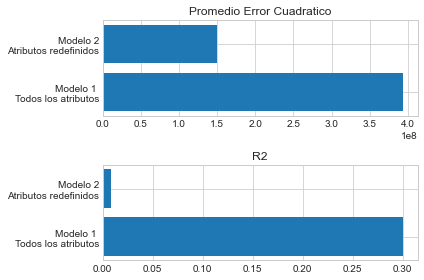

In [41]:
labels = ['Modelo 1 \nTodos los atributos', 'Modelo 2\nAtributos redefinidos']
plt.subplot(2,1,1)
plt.barh(labels, [mse_modelo, purge_model_mse])
plt.title('Promedio Error Cuadratico')
plt.subplot(2,1,2)
plt.barh(labels, [r2_modelo, purge_model_r2])
plt.title('R2')
plt.tight_layout()